<a href="https://colab.research.google.com/github/jisu-nam/kubme_ai-Illjo/blob/master/ASS2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Y1 = X**4 + X**2 Y2 = X**2 + X
데이터는 총 1000(-15~15)
std = 3
L2loss
epoch = 10000
lr = 0.005

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

데이터 준비

In [0]:
num_data = 1000
num_epoch = 10000

In [0]:
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y1 = x**4 + x**2
y2 = x**2 + x

noise = init.normal_(torch.FloatTensor(num_data,1), std =3)

y1_noise = (x+noise)**4 + (x+noise)**2
y2_noise = (x+noise)**2 + (x+noise)

인공 신경망 모델

In [0]:
model1= nn.Sequential(
    nn.Linear(1,3), nn.ReLU(),
    nn.Linear(3,5), nn.ReLU(),
    nn.Linear(5,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,1)
    )

model2= nn.Sequential(
    nn.Linear(1,3), nn.ReLU(),
    nn.Linear(3,5), nn.ReLU(),
    nn.Linear(5,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,1)
    )

손실 함수

In [0]:
loss_func = nn.MSELoss()

학습 진행

In [0]:
def training(model, x ,y_noise ,num_epoch):
  optimizer = optim.Adam(model.parameters(), lr = 0.001)
  loss_array = []
  for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()

    loss_array.append(loss.data)

  return loss_array

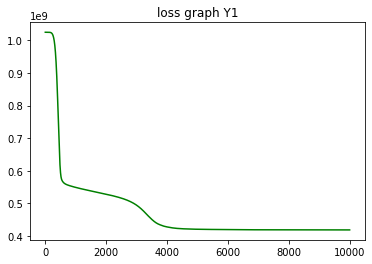

In [49]:
Y1 = training(model1,x,y1_noise,num_epoch)

plt.plot(Y1, 'g-')
plt.title('loss graph Y1')
plt.show()

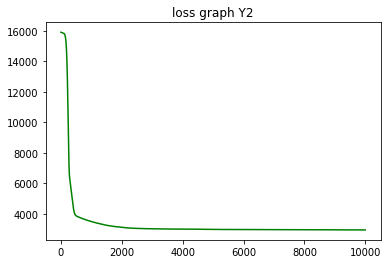

In [50]:
Y2 = training(model2,x,y2_noise,num_epoch)

plt.plot(Y2, 'g-')
plt.title('loss graph Y2')
plt.show()

모델 검증 Y1

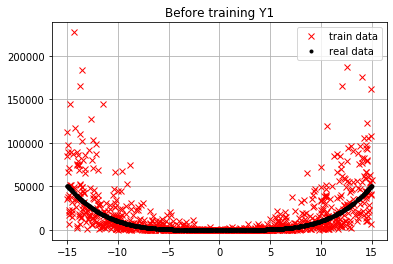

In [51]:
plt.plot(x.data, y1_noise, 'rx')
plt.plot(x.data, y1.data, 'k.')
plt.legend(['train data','real data'])
plt.title('Before training Y1')
plt.grid(True)
plt.show()

In [0]:
num_data = 1000

test_x = init.uniform_(torch.Tensor(num_data, 1),-15, 15)
test_y1 = model1(test_x)

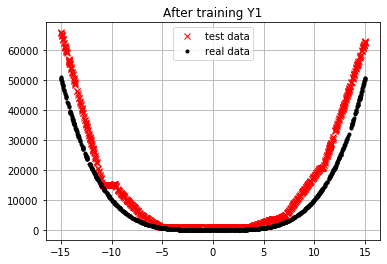

In [53]:
plt.plot(test_x.data, test_y1.data,'rx')
plt.plot(x.data, y1.data, 'k.')
plt.legend(['test data','real data'])
plt.title('After training Y1')
plt.grid(True)
plt.show()

모델 검증 Y2

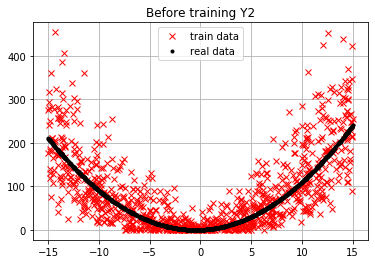

In [54]:
plt.plot(x.data, y2_noise, 'rx')
plt.plot(x.data, y2.data, 'k.')
plt.legend(['train data', 'real data'])
plt.title('Before training Y2')
plt.grid(True)
plt.show()

In [0]:
num_data = 1000

test_x = init.uniform_(torch.Tensor(num_data, 1),-15, 15)
test_y2 = model2(test_x)

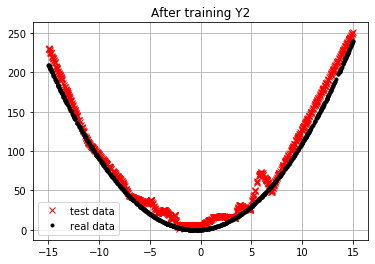

In [56]:
plt.plot(test_x.data, test_y2.data,'rx')
plt.plot(x.data, y2.data, 'k.')
plt.legend(['test data','real data'])
plt.title('After training Y2')
plt.grid(True)
plt.show()